# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Generating-Fractal-From-Random-Points---The-Chaos-Game" data-toc-modified-id="Generating-Fractal-From-Random-Points---The-Chaos-Game-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Generating Fractal From Random Points - The Chaos Game</a></div><div class="lev2 toc-item"><a href="#Initial-Definitions" data-toc-modified-id="Initial-Definitions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Initial Definitions</a></div><div class="lev2 toc-item"><a href="#Make-A-Fractal" data-toc-modified-id="Make-A-Fractal-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Make A Fractal</a></div><div class="lev4 toc-item"><a href="#Regular-Polygons" data-toc-modified-id="Regular-Polygons-1.2.0.1"><span class="toc-item-num">1.2.0.1&nbsp;&nbsp;</span>Regular Polygons</a></div><div class="lev4 toc-item"><a href="#Exploring-Further:-Dimension" data-toc-modified-id="Exploring-Further:-Dimension-1.2.0.2"><span class="toc-item-num">1.2.0.2&nbsp;&nbsp;</span>Exploring Further: Dimension</a></div><div class="lev4 toc-item"><a href="#Randomness-on-Large-Scales" data-toc-modified-id="Randomness-on-Large-Scales-1.2.0.3"><span class="toc-item-num">1.2.0.3&nbsp;&nbsp;</span>Randomness on Large Scales</a></div><div class="lev2 toc-item"><a href="#Learn-More:" data-toc-modified-id="Learn-More:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Learn More:</a></div>

In [1]:
import pickle,glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Generating Fractal From Random Points - The Chaos Game

## Initial Definitions

In [3]:
def placeStartpoint(npts,fixedpts):
    #Start Point
    #start = (0.5,0.5)
    start = (np.random.random(),np.random.random())

    if fixedpts == []: #generates a set of random verticies
        for i in range(npts):
            randx = np.random.random()
            randy = np.random.random()
            point = (randx,randy)
            fixedpts.append(point)
            
    return (start,fixedpts)
        

In [4]:
def choosePts(npts,fixedpts,frac):
    #chooses a vertex at random
    #further rules could be applied here
    roll = floor(npts*np.random.random())
    point = fixedpts[int(roll)]
    
    return point

In [5]:
def placeItteratePts(npts,itt,start,fixedpts,frac):
    ittpts = []
    
    for i in range(itt):
        point = choosePts(npts,fixedpts,frac) #chooses a vertex at random
#        halfway = ((point[0]+start[0])*frac,(point[1]+start[1])*frac) #calculates the halfway point between the starting point and the vertex
        halfway = ((point[0]-start[0])*(1.0 - frac)+start[0],(point[1]-start[1])*(1.0 - frac)+start[1])
        ittpts.append(halfway)
        start = halfway #sets the starting point to the new point
        
    return ittpts

In [44]:
def plotFractal(start,fixedpts,ittpts):
    # set axes range
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    
    plt.axes().set_aspect('equal')
    
    #plots the verticies
    plt.scatter(transpose(fixedpts)[0],transpose(fixedpts)[1],alpha=0.8, c='black', edgecolors='none', s=30)
    #plots the starting point
    plt.scatter(start[0],start[1],alpha=0.8, c='red', edgecolors='none', s=30)    
    #plots the itterated points
    plt.scatter(transpose(ittpts)[0],transpose(ittpts)[1],alpha=0.5, c='blue', edgecolors='none', s=2)
    
    return

In [51]:
def GenerateFractal(npts,frac,itt,reg=False):
    #Error Control
    if npts < 1 or frac >= 1.0 or frac <= 0.0 or type(npts) is not int or type(frac) is not float or type(itt) is not int:
        print "number of points must be a positive integer, compression fraction must be a positive float less than 1.0, itt must be a positive integer"
        return
    if frac > 0.5:
        print "Warning: compression fractions over 1/2 do not lead to fractals"

    #Initilize Verticies
    if not reg:
        fixedpts = [] #Random Verticies
    else:
        if npts == 3:
            fixedpts = [(0.0,0.0),(1.0,0.0),(0.5,0.5*sqrt(3.0))] #Equilateral Triangle (npts = 3)
        elif npts == 4:
            fixedpts = [(0.0,0.0),(1.0,0.0),(1.0,1.0),(0.0,1.0)] #Square
        elif npts == 5:
            fixedpts = [(0.0,2./(1+sqrt(5.))),(0.5-2./(5+sqrt(5.)),0.0),(0.5,1.0),(0.5+2./(5+sqrt(5.)),0.0),(1.0,2./(1+sqrt(5.)))] #Regular Pentagon
        elif npts == 6:
            fixedpts = [(0.0,0.5),(1./4,0.5+.25*sqrt(3.)),(3./4,0.5+.25*sqrt(3.)),(1.0,0.5),(3./4,0.5-.25*sqrt(3.)),(1./4,0.5-.25*sqrt(3.))] #Regular Hexagon
        elif npts == 2:
            fixedpts = [(0.0,0.0),(1.0,1.0)] #Line
        elif npts == 1:
            fixedpts = [(0.5,0.5)] #Line
        else:
            print "No regular polygon stored with that many verticies, switching to default with randomly assigned verticies"
            fixedpts = [] #Random Verticies

    #Compression Fraction
#    frac = 1.0/2.0 #Sierpinski's Triangle (npts = 3)
#    frac = 1.0/2.0 #Sierpinski's "Square" (filled square, npts = 4)
#    frac = 1.0/3.0 #Sierpinski's Pentagon (npts = 5)
#    frac = 3.0/8.0 #Sierpinski's Hexagon (npts = 6)

        
    if len(fixedpts) != npts and len(fixedpts) != 0:
        print "The number of verticies don't match the length of the list of verticies. If you want the verticies generated at random, set fixedpts to []"
        return
    if len(fixedpts) != 0:
        print "Fractal Dimension = {}".format(-log(npts)/log(frac))
    
        
    (start, fixedpts) = placeStartpoint(npts,fixedpts)
    
    ittpts = placeItteratePts(npts,itt,start,fixedpts,frac)
    
    plotFractal(start,fixedpts,ittpts)
    
    return
    
    

## Make A Fractal

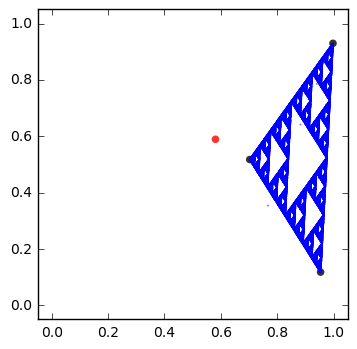

In [52]:
# Call the GenerateFractal function with a number of verticies, a number of itterations, and the compression fraction
# The starting verticies are random by default. An optional input of True will set the verticies to those of a regular polygon.
GenerateFractal(3,.5,50000)

#### Regular Polygons

Fractal Dimension = 1.58496250072


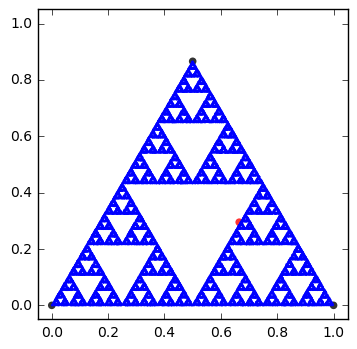

In [73]:
GenerateFractal(3,.5,50000,True)

Fractal Dimension = 1.46497352072


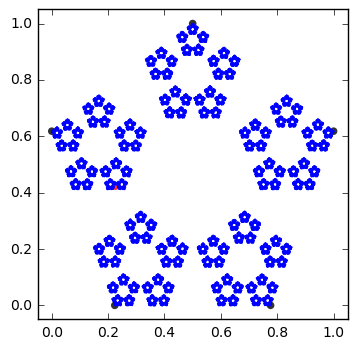

In [74]:
GenerateFractal(5,1./3,50000,True)

Fractal Dimension = 1.82678021045


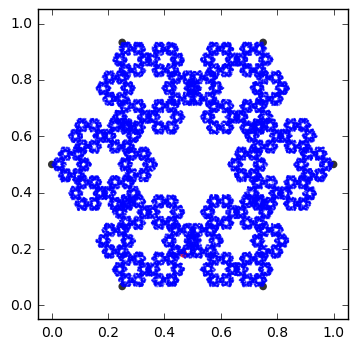

In [75]:
GenerateFractal(6,3./8,50000,True)

#### Exploring Further: Dimension

Fractal Dimension = 0.0


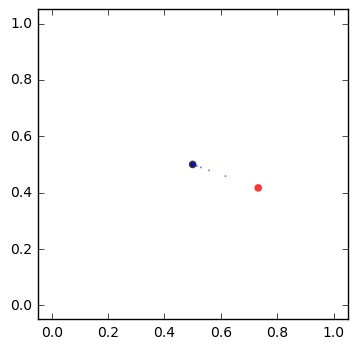

In [61]:
GenerateFractal(1,.5,50000,True)

Fractal Dimension = 1.0


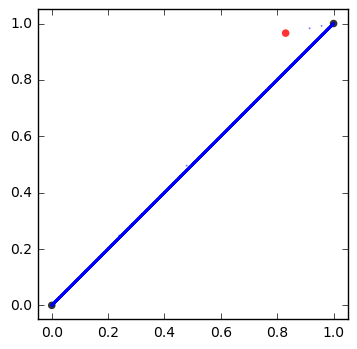

In [64]:
GenerateFractal(2,.5,50000,True)

Fractal Dimension = 2.0


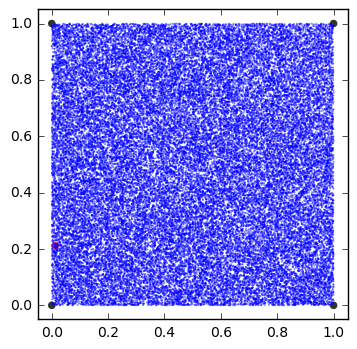

In [54]:
GenerateFractal(4,.5,50000,True)

#### Randomness on Large Scales

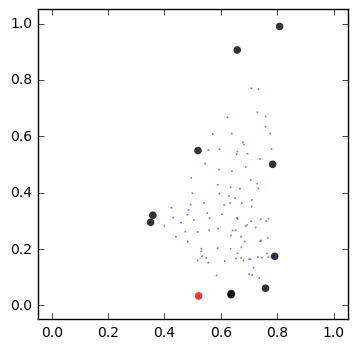

In [76]:
GenerateFractal(10,.5,100)

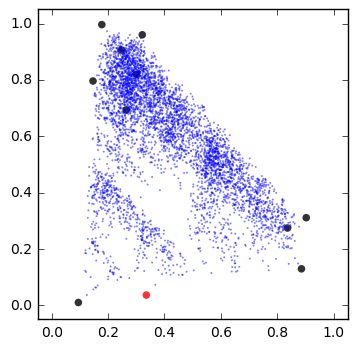

In [82]:
GenerateFractal(10,.5,5000)

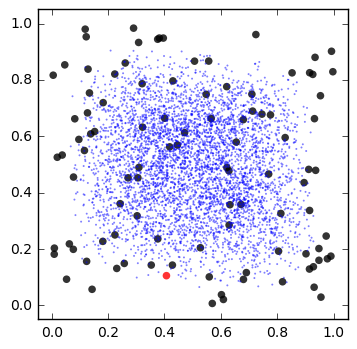

In [81]:
GenerateFractal(100,.5,5000)

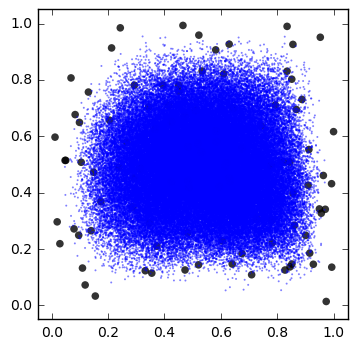

In [80]:
GenerateFractal(100,.5,100000)

## Learn More:


[Chaos Game Wiki](https://en.wikipedia.org/wiki/Chaos_game)

[Numberphile Video](https://www.youtube.com/watch?v=kbKtFN71Lfs)

[Chaos in the Classroom](http://math.bu.edu/DYSYS/chaos-game/chaos-game.html)

[Chaos Rules!](http://www.maa.org/sites/default/files/pdf/upload_library/2/Devaney%202005.pdf)